In [2]:
#Importing relevant functions
import statsmodels.api as sm
import statsmodels as sms
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import os
%matplotlib inline


# II. Qualitative Dependent Variable Models

In [3]:
data1 = pd.read_csv(r"/Users/bharatsingh/Downloads/diabetes_prediction_dataset.csv")

In [4]:
data1

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [5]:
data1 = data1.dropna()

In [6]:
data1.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [7]:
data1 = data1[data1['gender']!='Other']

In [8]:
# Assuming 'Male' is represented by 0 and 'Female' is represented by 1
data1['gender'] = data1['gender'].map({'Male': 0, 'Female': 1})

# If you want to switch the values (0 for 'Female' and 1 for 'Male'), you can use:
# data1['gender'] = 1 - data1['gender']

# Print the modified DataFrame
print(data1)


       gender   age  hypertension  heart_disease smoking_history    bmi  \
0           1  80.0             0              1           never  25.19   
1           1  54.0             0              0         No Info  27.32   
2           0  28.0             0              0           never  27.32   
3           1  36.0             0              0         current  23.45   
4           0  76.0             1              1         current  20.14   
...       ...   ...           ...            ...             ...    ...   
99995       1  80.0             0              0         No Info  27.32   
99996       1   2.0             0              0         No Info  17.37   
99997       0  66.0             0              0          former  27.83   
99998       1  24.0             0              0           never  35.42   
99999       1  57.0             0              0         current  22.43   

       HbA1c_level  blood_glucose_level  diabetes  
0              6.6                  140        

In [9]:
data1['gender'].isnull().sum()

0

In [10]:
data1

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1,80.0,0,1,never,25.19,6.6,140,0
1,1,54.0,0,0,No Info,27.32,6.6,80,0
2,0,28.0,0,0,never,27.32,5.7,158,0
3,1,36.0,0,0,current,23.45,5.0,155,0
4,0,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,1,80.0,0,0,No Info,27.32,6.2,90,0
99996,1,2.0,0,0,No Info,17.37,6.5,100,0
99997,0,66.0,0,0,former,27.83,5.7,155,0
99998,1,24.0,0,0,never,35.42,4.0,100,0


In [11]:
df= data1.drop(['smoking_history'], axis=1)  
df.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1,80.0,0,1,25.19,6.6,140,0
1,1,54.0,0,0,27.32,6.6,80,0
2,0,28.0,0,0,27.32,5.7,158,0
3,1,36.0,0,0,23.45,5.0,155,0
4,0,76.0,1,1,20.14,4.8,155,0


In [12]:
# Dont run this for now
#Dropping columns with Null Value
columns_to_dropna = ['gender']
df = data1.dropna(subset=columns_to_dropna)

print("\nDataFrame after dropping null values:")
print(df)


DataFrame after dropping null values:
       gender   age  hypertension  heart_disease smoking_history    bmi  \
0           1  80.0             0              1           never  25.19   
1           1  54.0             0              0         No Info  27.32   
2           0  28.0             0              0           never  27.32   
3           1  36.0             0              0         current  23.45   
4           0  76.0             1              1         current  20.14   
...       ...   ...           ...            ...             ...    ...   
99995       1  80.0             0              0         No Info  27.32   
99996       1   2.0             0              0         No Info  17.37   
99997       0  66.0             0              0          former  27.83   
99998       1  24.0             0              0           never  35.42   
99999       1  57.0             0              0         current  22.43   

       HbA1c_level  blood_glucose_level  diabetes  
0       

# Question 3

# Linear Probability Model

In [13]:
# y = 1 (diabetic), = 0 (otherwise)
# Estimating a linear probability model:
model1 = smf.ols(formula='diabetes~gender+age+hypertension+heart_disease+bmi+HbA1c_level+blood_glucose_level',
                  data=df)
results_model1 = model1.fit(cov_type='HC3')

# Print regression table:
table = pd.DataFrame({'b': round(results_model1.params, 4),
                      'se': round(results_model1.bse, 4),
                      't': round(results_model1.tvalues, 4),
                      'pval': round(results_model1.pvalues, 4)})
print(f'table: \n{table}\n')




table: 
                          b      se         t  pval
Intercept           -0.8581  0.0065 -131.7936   0.0
gender              -0.0135  0.0015   -9.1661   0.0
age                  0.0014  0.0000   39.9885   0.0
hypertension         0.0960  0.0042   22.7934   0.0
heart_disease        0.1170  0.0060   19.6275   0.0
bmi                  0.0043  0.0001   31.0290   0.0
HbA1c_level          0.0813  0.0008  105.1343   0.0
blood_glucose_level  0.0023  0.0000  104.8382   0.0



In [35]:
# Calculate Pseudo-R-squared for Model1
pseudo_r2 = model_1.rsquared
print(f'Pseudo R-squared for Model1: {pseudo_r2:.4f}')



Pseudo R-squared for Model1: 0.3484


In [14]:
model1 = smf.ols('diabetes~gender+age+hypertension+heart_disease+bmi+HbA1c_level+blood_glucose_level', data = df)
model_1 = model1.fit()
model_1.params
# Look at the Model1 Fit Summary
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:               diabetes   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     7635.
Date:                Tue, 05 Dec 2023   Prob (F-statistic):               0.00
Time:                        14:01:10   Log-Likelihood:                 7207.3
No. Observations:               99982   AIC:                        -1.440e+04
Df Residuals:                   99974   BIC:                        -1.432e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -0.8581    

In [15]:
#for linear prob model 
x = model_1.resid.mean()
print("Linear Probability Model: ", x)

Linear Probability Model:  9.691806611255181e-15


# Test for multicollinearity

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming df_transformed4 is your DataFrame
# Extract the features for which you want to calculate VIF
features = df[['gender','age','hypertension','heart_disease','bmi','HbA1c_level','blood_glucose_level']]

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Variable"] = features.columns
vif_data["VIF"] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]

# Display the VIF values
print(vif_data)

              Variable        VIF
0               gender   2.365920
1                  age   5.561574
2         hypertension   1.156217
3        heart_disease   1.115576
4                  bmi  15.769986
5          HbA1c_level  17.034088
6  blood_glucose_level  11.588787


High VIF values indicate a potential issue with multicollinearity, suggesting that some independent variables are highly correlated with each other. Here are several strategies to address high VIF values:

Combine Highly Correlated Variables: If two or more variables are highly correlated, consider combining them into a single variable.

Remove One of the Correlated Variables: If two variables are redundant, you might choose to keep the one that is more theoretically relevant or has stronger empirical support. Removing one of the correlated variables can reduce multicollinearity.



In [17]:
# 'bmi' and 'HbA1c_level' are highly correlated

# Drop the variables
df.drop(['bmi', 'HbA1c_level'], axis=1, inplace=True)

# Recalculate VIF
features = df[['gender','age','hypertension','heart_disease','blood_glucose_level']]

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Variable"] = features.columns
vif_data["VIF"] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]

# Display the VIF values
print(vif_data)

              Variable       VIF
0               gender  2.233468
1                  age  4.323163
2         hypertension  1.154789
3        heart_disease  1.111350
4  blood_glucose_level  4.500496


### We have removed multicollinearity from the model.

In [18]:
model2 = smf.ols('diabetes~gender+age+hypertension+heart_disease+blood_glucose_level', data = df)
model_2 = model2.fit()
model_2.params
# Look at the Model1 Fit Summary
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:               diabetes   R-squared:                       0.243
Model:                            OLS   Adj. R-squared:                  0.243
Method:                 Least Squares   F-statistic:                     6427.
Date:                Tue, 05 Dec 2023   Prob (F-statistic):               0.00
Time:                        14:01:13   Log-Likelihood:                -269.48
No. Observations:               99982   AIC:                             551.0
Df Residuals:                   99976   BIC:                             608.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -0.3706    

# Testing for heteroskedasticity

In [19]:
# The BP test allows us to test whether the residuals of our regression can be predicted as a linear combination of our predictors

# pull out squared residuals
df["res"] = model_2.resid**2

# try to predict the squared residuals using a linear combination of our variables
aux_reg = smf.ols('diabetes~gender+age+hypertension+heart_disease+blood_glucose_level', df).fit()

# Get the regression f-statistic (f-test version)
f = aux_reg.fvalue
fp = aux_reg.f_pvalue

print("The F-Statistic for the Auxiliary Regression is: "+ str(f) +" and the P-Value is: "+ str(fp))

The F-Statistic for the Auxiliary Regression is: 6427.060004303085 and the P-Value is: 0.0


### Resolving heteroskedasticity

In [20]:
# Feasible GLS
df["ehatsq"] = model_2.resid**2

# estimate weights
w_est = smf.ols('np.log(ehatsq) ~ gender+age+hypertension+heart_disease+blood_glucose_level', data = df).fit()

vari = np.exp(w_est.fittedvalues) #estimated variances
w = 1/vari**2

fgls =smf.wls('diabetes~gender+age+hypertension+heart_disease+blood_glucose_level', df, weights = w).fit()

fgls.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:               diabetes   R-squared:                       0.021
Model:                            WLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     434.4
Date:                Tue, 05 Dec 2023   Prob (F-statistic):               0.00
Time:                        14:01:14   Log-Likelihood:                 46419.
No. Observations:               99982   AIC:                        -9.283e+04
Df Residuals:                   99976   BIC:                        -9.277e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -0.0328      0.001    -37.666      0.000      -0.034      -0.031
gender                 -0.0008      0.000     -2.153      0.031      -0.001   -6.91e-05
age                     0.0002      1e-05     24.259      0.000       0.000       0.000
hypertension            0.0288      0.006      4.955      0.000       0.017       0.040
heart_disease           0.0316      0.009      3.484      0.000       0.014       0.049
blood_glucose_level     0.0003   8.56e-06     38.796      0.000       0.000       0.000
==============================================================================
Omnibus:                   134042.584   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         27394464.818
Skew:                           7.810   Prob(JB):                         0.00
Kurtosis:                      82.573   Cond. No.                     5.20e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Heteroskedasticity:
        We detected heteroskedasticity using the Breusch-Pagan test and resolved it using Feasible GLS (Generalized Least Squares) with weighted least squares (WLS).
        Feasible GLS considered the squared residuals and estimated weights to account for varying variances across observations.
        The WLS regression results (fgls) showed improvements in terms of the F-statistic for the model.

    
### Interpretation:

    The removal of highly correlated variables ('bmi' and 'HbA1c_level') likely resulted in a more stable estimation, as high multicollinearity can lead to unstable coefficient estimates.
    Addressing heteroskedasticity using Feasible GLS with WLS does not help in producing more efficient and unbiased estimates by considering varying variances across observations as the r-squared is more in the main model that we has before.

#  Test for model misspecification

In [21]:
# Create our suspect model
model2 = smf.ols('diabetes~gender+age+hypertension+heart_disease+blood_glucose_level', df).fit()

In [22]:
# Take the fitted values up to the desired power
df["fitted2"] = model2.fittedvalues**3
df["fitted3"] = model2.fittedvalues**3

# Fit regression on polynomial
ramseyreg = smf.ols('diabetes~gender+age+hypertension+heart_disease+blood_glucose_level + fitted2 + fitted3', df).fit()

# run ftest on polynomial values
hypotheses = ['fitted2 = 0', "fitted3 = 0"]

# we reject the null that the functional form is adequate
ramseyreg.f_test(hypotheses)     

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=5323.090266167265, p=0.0, df_denom=1e+05, df_num=2>

In [23]:
import statsmodels.stats.outliers_influence as smo

In [24]:
# statsmodels method
reset_out = smo.reset_ramsey(res = model2, degree = 3)
reset_out

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=7348.754101301891, p=0.0, df_denom=1e+05, df_num=2>

    F-Statistic: The F-statistic is a measure of how well the entire set of polynomial terms explains the variance in the dependent variable compared to a model with no polynomial terms. In this case, the F-statistic is approximately 5323.09.

    p-value: The p-value associated with the F-statistic is 0.0 (very close to zero). In hypothesis testing, a low p-value (typically less than 0.05) indicates that we can reject the null hypothesis. In this context, the null hypothesis assumes that the polynomial terms (fitted2 and fitted3) have no effect, while the alternative hypothesis suggests that they do have a significant effect.

    Degrees of Freedom: The degrees of freedom for the F-test are provided as df_denom=1e+05 (denominator degrees of freedom) and df_num=2 (numerator degrees of freedom). This indicates the number of observations minus the number of parameters being tested. In this case, there are 2 degrees of freedom in the numerator (associated with the two polynomial terms) and 100,000 degrees of freedom in the denominator.

    Conclusion: Since the p-value is very close to zero, we can reject the null hypothesis. Therefore, the results suggest that including the polynomial terms significantly improves the model fit. The polynomial terms (fitted2 and fitted3) contribute significantly to explaining the variance in the dependent variable beyond the linear terms.

# Our Final Model on the basis of these tests:

In [25]:
# y = 1 (diabetic), = 0 (otherwise)
# Estimating a linear probability model:
model_final = smf.ols(formula='diabetes~gender+age+hypertension+heart_disease+blood_glucose_level+fitted2+fitted3',
                  data=df)
results_model_final = model_final.fit(cov_type='HC3')

# Print regression table:
table = pd.DataFrame({'b': round(results_model_final.params, 4),
                      'se': round(results_model_final.bse, 4),
                      't': round(results_model_final.tvalues, 4),
                      'pval': round(results_model_final.pvalues, 4)})
print(f'table: \n{table}\n')


table: 
                          b      se        t    pval
Intercept           -0.1735  0.0040 -43.9170  0.0000
gender              -0.0112  0.0015  -7.4137  0.0000
age                  0.0016  0.0000  45.5273  0.0000
hypertension         0.0250  0.0048   5.1784  0.0000
heart_disease       -0.0091  0.0069  -1.3173  0.1877
blood_glucose_level  0.0012  0.0000  43.9978  0.0000
fitted2              1.8016  0.0360  50.0804  0.0000
fitted3              1.8016  0.0360  50.0804  0.0000



# Probit Model

In [26]:
# Estimate a probit model:
reg_probit = smf.probit(formula='diabetes~gender+age+hypertension+heart_disease+blood_glucose_level+fitted2+fitted3',
                        data=df)
results_probit = reg_probit.fit(disp=0)
print(f'results_probit.summary(): \n{results_probit.summary()}\n')

# log likelihood value:
print(f'results_probit.llf: {results_probit.llf}\n')

# McFadden's pseudo R2:
print(f'results_probit.prsquared: {results_probit.prsquared}\n')

results_probit.summary(): 
                          Probit Regression Results                           
Dep. Variable:               diabetes   No. Observations:                99982
Model:                         Probit   Df Residuals:                    99975
Method:                           MLE   Df Model:                            6
Date:                Tue, 05 Dec 2023   Pseudo R-squ.:                  0.3780
Time:                        14:01:19   Log-Likelihood:                -18087.
converged:                       True   LL-Null:                       -29080.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -4.4529      0.058    -76.190      0.000      -4.567      -4.338
gender                 -0.1087      0.015     -7.434      0.000      -0.137  

# Logit Model

In [27]:
# Estimate a logit model:

reg_logit = smf.logit(formula='diabetes~gender+age+hypertension+heart_disease+blood_glucose_level+fitted2+fitted3', data=df)

# disp = 0 avoids printing out information during the estimation:
results_logit = reg_logit.fit(disp=0)
print(f'results_logit.summary(): \n{results_logit.summary()}\n')

# log likelihood value:
print(f'results_logit.llf: {results_logit.llf}\n')

# McFadden's pseudo R2:
print(f'results_logit.prsquared: {results_logit.prsquared}\n')

results_logit.summary(): 
                           Logit Regression Results                           
Dep. Variable:               diabetes   No. Observations:                99982
Model:                          Logit   Df Residuals:                    99975
Method:                           MLE   Df Model:                            6
Date:                Tue, 05 Dec 2023   Pseudo R-squ.:                  0.3751
Time:                        14:01:20   Log-Likelihood:                -18172.
converged:                       True   LL-Null:                       -29080.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -8.8216      0.121    -72.712      0.000      -9.059      -8.584
gender                 -0.2308      0.029     -8.006      0.000      -0.287   

# Confusion Matrix and Other Classification Metrics



[[90863   619]
 [ 5289  3211]]
Accuracy = 0.9409093636854634


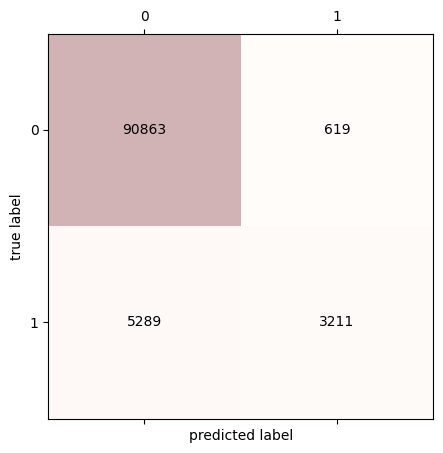

              precision    recall  f1-score   support

           0      0.945     0.993     0.969     91482
           1      0.838     0.378     0.521      8500

    accuracy                          0.941     99982
   macro avg      0.892     0.685     0.745     99982
weighted avg      0.936     0.941     0.930     99982

Accuracy = 0.9409093636854634
Specificity =  0.9932336415906954
Sensitivity =  0.37776470588235295


In [28]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, precision_score
import matplotlib.pyplot as plt
X_cols = ['gender','age','hypertension','heart_disease','blood_glucose_level','fitted2','fitted3'] 
lr = LogisticRegression()
logit_mod = lr.fit(df[X_cols], df['diabetes'])
conf_mat = confusion_matrix(df['diabetes'], lr.predict(df[X_cols]))
print(conf_mat) 
print('Accuracy =', lr.score(df[X_cols],df['diabetes']))

# Confusion matrix plot Raschka (2014)
fig, ax = plt.subplots(figsize=(7, 5))
ax.matshow(conf_mat, cmap=plt.cm.Reds, alpha=0.3)
for i in range(conf_mat.shape[0]):
    for j in range(conf_mat.shape[1]):
        ax.text(x=j, y=i,
        s=conf_mat[i, j],
        va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

# We can print other metrics
print(classification_report(df['diabetes'], lr.predict(df[X_cols]), digits=3))

cm1 = confusion_matrix(df['diabetes'], lr.predict(df[X_cols]))
total1=sum(sum(cm1))
Accuracy = (cm1[0,0]+cm1[1,1])/total1
Specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
Sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Accuracy =', Accuracy)
print('Specificity = ', Specificity)
print('Sensitivity = ', Sensitivity)

### Confusion Matrix:

    True Positive (TP): 3211 instances were correctly predicted as positive (diabetic).
    True Negative (TN): 90863 instances were correctly predicted as negative (non-diabetic).
    False Positive (FP): 619 instances were incorrectly predicted as positive.
    False Negative (FN): 5289 instances were incorrectly predicted as negative.

#### Accuracy:

    The accuracy of the model is calculated as (TP + TN) / Total, which is approximately 94.1%. This suggests that the model is accurate in predicting both positive and negative cases.

#### Precision, Recall, and F1-Score:

    Precision (also called positive predictive value) is the proportion of correctly predicted positive instances among the instances predicted as positive. Precision for class 1 (diabetic) is 83.8%, indicating that out of the instances predicted as diabetic, 83.8% are actually diabetic.

    Recall (also called sensitivity or true positive rate) is the proportion of correctly predicted positive instances among all actual positive instances. Recall for class 1 (diabetic) is 37.8%, suggesting that the model captures 37.8% of all actual diabetic instances.

    F1-Score is the harmonic mean of precision and recall. It is a measure that balances precision and recall. The weighted average F1-Score for both classes is 93.0%.

#### Specificity and Sensitivity:

    Specificity is the proportion of correctly predicted negative instances among all actual negative instances. Specificity is high at 99.3%, indicating that the model is very good at identifying non-diabetic instances.

    Sensitivity is another term for recall. It is the proportion of correctly predicted positive instances among all actual positive instances. Sensitivity is relatively lower at 37.8%, indicating that the model doesn't capture all diabetic instances.

### Interpretation:

    The model performs well in terms of accuracy, specificity, and precision for non-diabetic instances. However, there is room for improvement in sensitivity (recall) for diabetic instances. 

    The trade-off between precision and recall should be considered based on the specific goals and requirements of the application. 

# Identifying the best model

### Let's evaluate each model:

#### Linear Probability Model:
        Advantages:
            Simple interpretation: Coefficients represent the change in the probability of the event for a one-unit change in the predictor.
        Disadvantages:
            Predicted probabilities may fall outside the [0, 1] range.
            Assumes constant marginal effects, which may not hold in all cases.

#### Logistic Regression:
        Advantages:
            Predicted probabilities are guaranteed to be in the [0, 1] range.
            Assumes constant elasticity of the odds, making it suitable for nonlinear relationships.
        Disadvantages:
            Coefficients are not directly interpretable in terms of probability changes.
            Assumes the log-odds relationship is linear.

#### Probit Regression:
        Advantages:
            Similar to Logit but assumes a different functional form for the cumulative distribution function.
            May be preferred when the normal distribution assumption is more appropriate.
        Disadvantages:
            Coefficients not directly interpretable in terms of probability changes.
            Less intuitive interpretation compared to Logit.

### Interpretation:

    LPM: The intercept represents the baseline probability, and coefficients indicate how the probability changes for a one-unit change in the predictor.
    
    Logit/Probit: Coefficients indicate the change in the log-odds (or cumulative distribution function) for a one-unit change in the predictor.

### Model Evaluation:

   Logit and Probit: Both models provide similar pseudo R-squared values, suggesting a moderate fit. **Logit outperforms Probit in terms of likelihood ratio tests and has a higher pseudo R-squared, indicating better goodness of fit.**
   Linear Probability Model: It has a **lower pseudo R-squared** , suggesting a weaker fit.

### Preferred Model:
Considering the nature of binary outcomes and the trade-offs between interpretability and goodness of fit, **the Logistic Regression (Logit) model appears to be the preferred choice**. It ensures predicted probabilities are within a valid range and provides a good balance between simplicity and model fit. The likelihood ratio test also supports the adequacy of the Logit model over the others.

# Prediction Comparisons: Linear Model vs. Logit vs. Probit

In [29]:
# Estimate the models:

# Linear
reg_lin = smf.ols(formula='diabetes~gender+age+hypertension+heart_disease+blood_glucose_level+fitted2+fitted3',
                  data=df)
results_lin = reg_lin.fit(cov_type='HC3')

# Logit
reg_logit = smf.logit(formula='diabetes~gender+age+hypertension+heart_disease+blood_glucose_level+fitted2+fitted3',
                      data=df)
results_logit = reg_logit.fit(disp=0)

# Probit
reg_probit = smf.probit(formula='diabetes~gender+age+hypertension+heart_disease+blood_glucose_level+fitted2+fitted3',
                        data=df)
results_probit = reg_probit.fit(disp=0)

X_new = pd.DataFrame(
    {'gender': [100, 0], 'age': [5, 17],
     'hypertension': [0, 30], 'heart_disease': [20, 52],
      'blood_glucose_level':[10,7], 'fitted2': [2, 0], 'fitted3': [0, 0],})
predictions_lin = results_lin.predict(X_new)
predictions_logit = results_logit.predict(X_new)
predictions_probit = results_probit.predict(X_new)

print(f'predictions_lin: \n{predictions_lin}\n')
print(f'predictions_logit: \n{predictions_logit}\n')
print(f'predictions_probit: \n{predictions_probit}\n')

predictions_lin: 
0    2.145211
1    0.140225
dtype: float64

predictions_logit: 
0    0.000007
1    1.000000
dtype: float64

predictions_probit: 
0    0.003058
1    1.000000
dtype: float64



### NOTE: R-squared is used as a goodness-of-fit measure for linear regression models. However, for probit and logit models, pseudo R-squared measures are more commonly used. However, unlike R-squared in linear regression, pseudo R-squared does not have a straightforward interpretation in terms of the variance explained. It is more of a relative measure, and different pseudo R-squared measures may have different interpretations, pseudo R-squared values are useful for model comparison within the same type of model but should be interpreted cautiously  with other goodness-of-fit measures.

# Prediction Comparisons: Linear Model vs. Logit vs. Probit


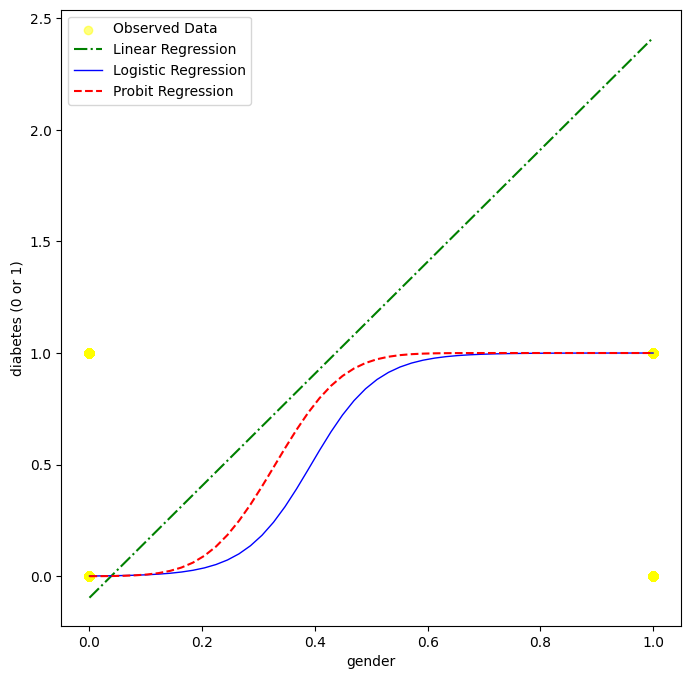

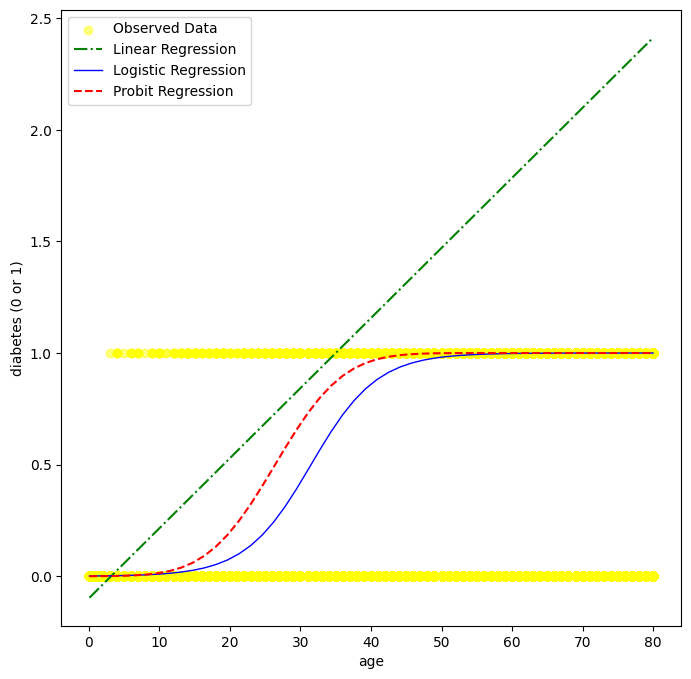

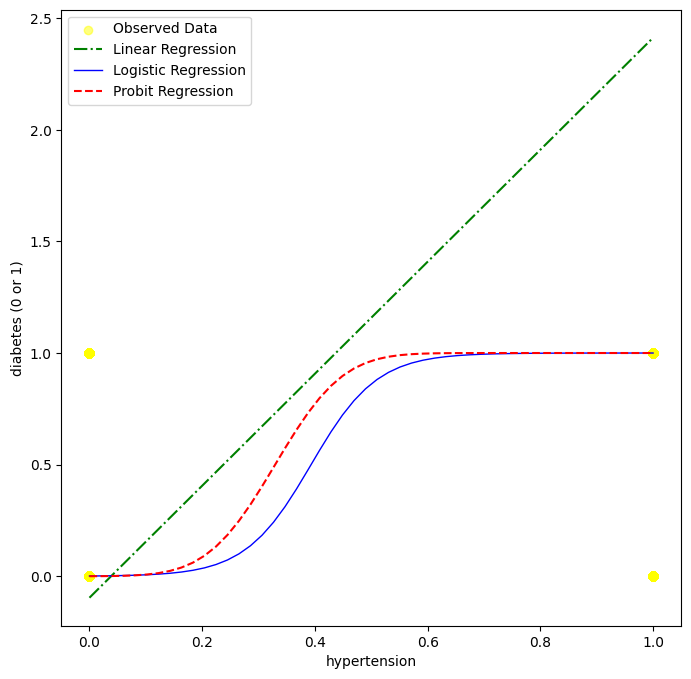

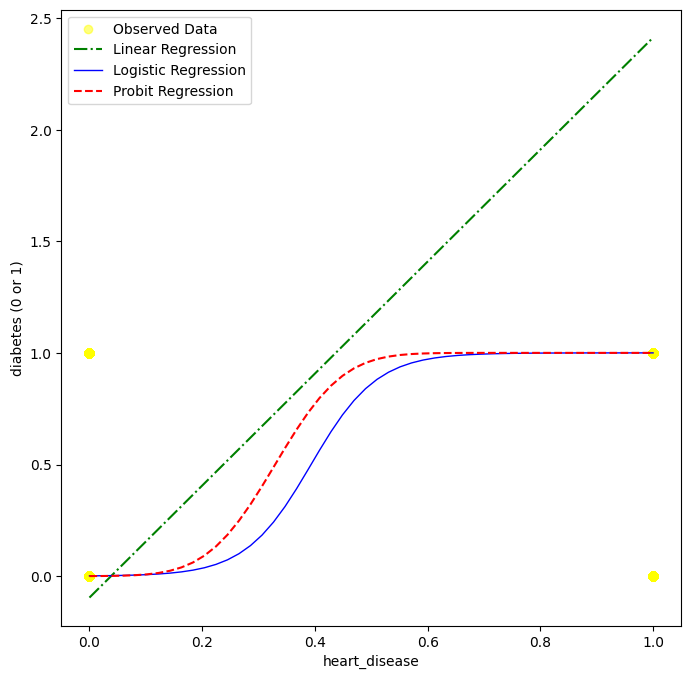

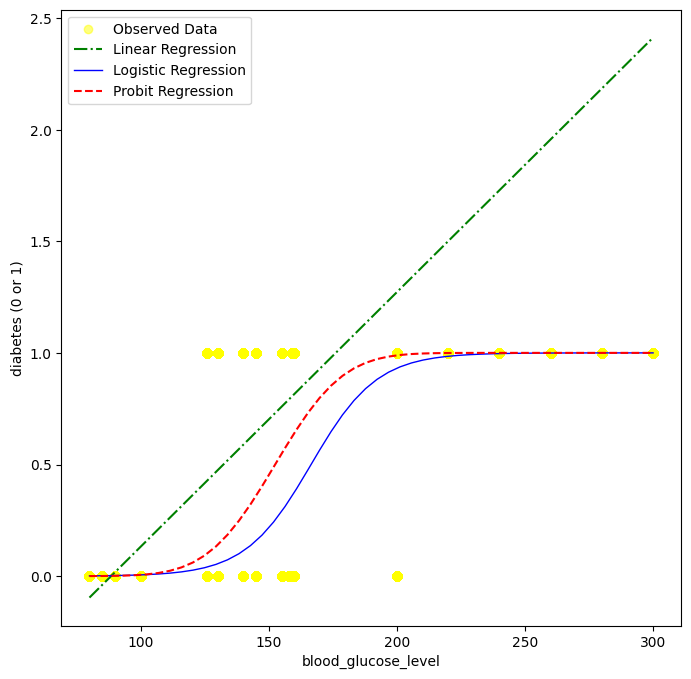

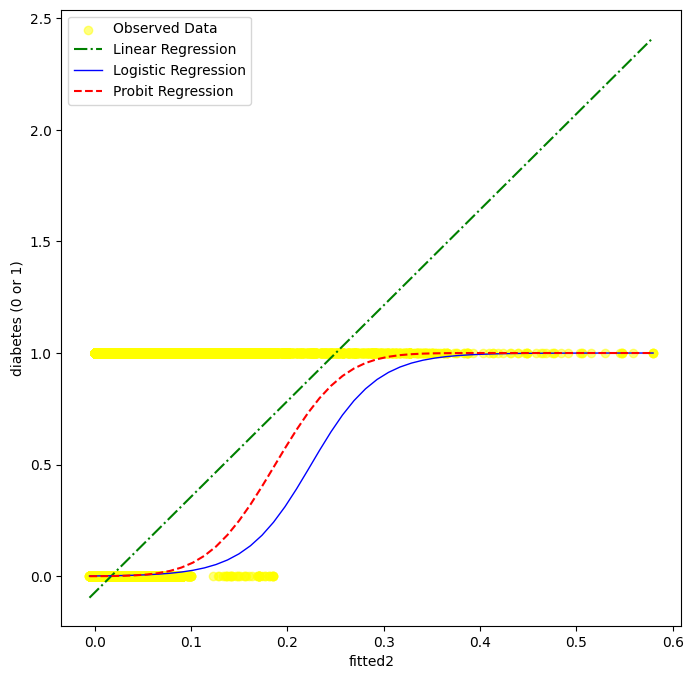

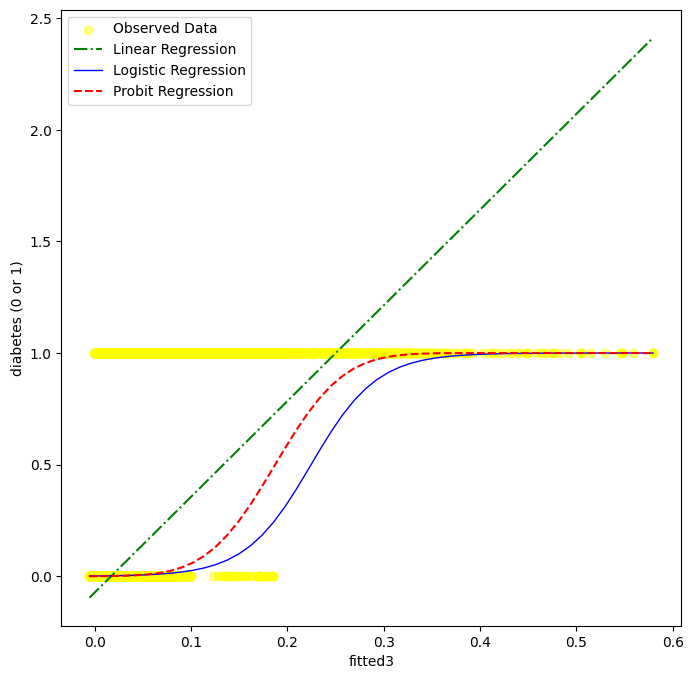

In [34]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt


# estimation:
reg_lin = smf.ols(formula='diabetes~gender+age+hypertension+heart_disease+blood_glucose_level+fitted2+fitted3', data=df)
results_lin = reg_lin.fit()
reg_logit = smf.logit(formula='diabetes~gender+age+hypertension+heart_disease+blood_glucose_level+fitted2+fitted3', data=df)
results_logit = reg_logit.fit(disp=0)
reg_probit = smf.probit(formula='diabetes~gender+age+hypertension+heart_disease+blood_glucose_level+fitted2+fitted3', data=df)
results_probit = reg_probit.fit(disp=0)

# Prediction for a regular grid of x values:
X_new = pd.DataFrame({'gender': np.linspace(df['gender'].min(), df['gender'].max(), 50),
                      'age': np.linspace(df['age'].min(), df['age'].max(), 50),
                      'hypertension': np.linspace(df['hypertension'].min(), df['hypertension'].max(), 50),
                      'heart_disease': np.linspace(df['heart_disease'].min(), df['heart_disease'].max(), 50),
                      'blood_glucose_level': np.linspace(df['blood_glucose_level'].min(), df['blood_glucose_level'].max(), 50),
                      'fitted2': np.linspace(df['fitted2'].min(), df['fitted2'].max(), 50),
                      'fitted3': np.linspace(df['fitted3'].min(), df['fitted3'].max(), 50)})

# Fitted values for each model
#X_new1 = df.drop(['diabetes'],axis=1)
predictions_lin = results_lin.predict(X_new)
predictions_logit = results_logit.predict(X_new)
predictions_probit = results_probit.predict(X_new)


# Scatter plot and fitted values:
for col in X_new.columns:
    
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.scatter(df[col], df['diabetes'], color='yellow', marker='o', label='Observed Data', alpha=0.5)
    ax.plot(X_new[col], predictions_lin, color='green', linestyle='-.', label='Linear Regression')
    ax.plot(X_new[col], predictions_logit, color='blue', linestyle='-', linewidth=1, label='Logistic Regression')
    ax.plot(X_new[col], predictions_probit, color='red', linestyle='--', label='Probit Regression')

    ax.set_ylabel('diabetes (0 or 1)')
    ax.set_xlabel(col)
    ax.legend()

    plt.show()

# Making prediction based on Logit Model

In [31]:
# Assuming df is your DataFrame and X_cols are the features used in the model
X_cols = ['gender', 'age', 'hypertension', 'heart_disease', 'blood_glucose_level', 'fitted2', 'fitted3']

# Making predictions
df['predicted_probabilities'] = results_logit.predict(df[X_cols])

# Setting a threshold (you can adjust this based on your needs)
threshold = 0.5
df['predicted_labels'] = (df['predicted_probabilities'] > threshold).astype(int)

# Displaying the predictions
print(df[['diabetes', 'predicted_probabilities', 'predicted_labels']].head(4))


   diabetes  predicted_probabilities  predicted_labels
0         0                 0.190854                 0
1         0                 0.008756                 0
2         0                 0.031089                 0
3         0                 0.031368                 0


### Commenting on their reliability:

Reliability of Predictions: Checking the predicted probabilities. Higher probabilities (closer to 1) suggest a higher confidence in predicting diabetes, while lower probabilities (closer to 0) suggest lower confidence.

Accuracy and Misclassifications: Compare the predicted labels with the actual diabetes status. Evaluate the accuracy and check for any misclassifications. You can calculate metrics such as accuracy, precision, recall, and F1-score.

Threshold Adjustment: A lower threshold may result in more positive predictions, while a higher threshold may lead to more conservative predictions. 
    
### Let's interpret and make predictions based on the provided information:

Diabetes Status (Actual): For the first four observations in our dataset:
            Observation 0: Actual diabetes status is 0 (non-diabetic).
            Observation 1: Actual diabetes status is 0 (non-diabetic).
            Observation 2: Actual diabetes status is 0 (non-diabetic).
            Observation 3: Actual diabetes status is 0 (non-diabetic).

Predicted Probabilities and Labels:

Observation 0: The predicted probability of having diabetes is 0.190854, and the predicted label is 0    (non-diabetic).

Observation 1: The predicted probability of having diabetes is 0.008756, and the predicted label is 0 (non-diabetic).

Observation 2: The predicted probability of having diabetes is 0.031089, and the predicted label is 0 (non-diabetic).

Observation 3: The predicted probability of having diabetes is 0.031368, and the predicted label is 0 (non-diabetic).

### The predicted probabilities represent the model's confidence in predicting the positive class (diabetic). Lower probabilities suggest lower confidence. If the predicted probability is above the threshold, it predicts 1 (diabetic); otherwise, it predicts 0 (non-diabetic).

### Evaluation:
   In these four observations, **the model predicts all instances as non-diabetic (predicted label 0).**
   
### Overall Reliability Assessment:

The model seems to be consistently predicting non-diabetic status for these observations.
The predicted probabilities are generally low, indicating a lack of strong evidence for diabetes.
However, reliability should be assessed across a larger set of data, and additional evaluation metrics should be considered for a comprehensive assessment.
        
    